### Import Libraries

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sn

%matplotlib inline



#### Dataset

In [2]:
df=pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\fashion-mnist_train.csv")

In [3]:
df.shape

(60000, 785)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X=df.iloc[:,1:].values

In [6]:
y=df.iloc[:,0].values

In [7]:
X.dtype

dtype('int64')

In [8]:
a=X[0].reshape(28,28)

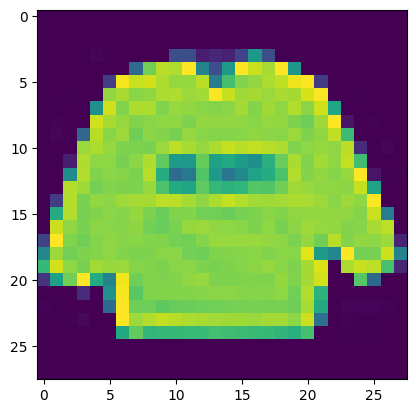

In [9]:
plt.imshow(a)

#### Splitting the Dataset into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 #### observation

 This code splits the dataset into two parts: a training set (80%) and a testing set (20%). The training set is used to train the model, while the testing set is used to evaluate its performance. This ensures that the model is tested on data it hasn't seen before, helping to check its generalization ability.

#### Initializing the K-Nearest Neighbors (KNN) Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)


In [12]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

##### Making Predictions with the KNN Classifier and Measuring Execution Time

In [13]:
import time
start = time.time()
y_pred=clf.predict(X_test)
print(time.time() - start)

13.863614320755005


###### Calculating the Accuracy of KNN Predictions








In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565833333333334

##### Scaling the Data using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

 #####  Reducing Dimensions with PCA to 200 Components

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)



In [43]:
print(X_train.shape)
print(X_train_new.shape)

(48000, 784)
(48000, 200)


In [44]:
X_train_new.shape

(48000, 200)

In [45]:
clf = KNeighborsClassifier()

In [46]:
clf.fit(X_train_new,y_train)

KNeighborsClassifier()

In [47]:
y_pred_new= clf.predict(X_test_new)

In [48]:
accuracy_score(y_test,y_pred_new)

0.8635

In [49]:
pca.explained_variance_ratio_

array([0.22063149, 0.1436806 , 0.05470123, 0.05115036, 0.04075697,
       0.03006086, 0.02733081, 0.02332288, 0.01702518, 0.01314579,
       0.01159965, 0.0096222 , 0.00895196, 0.00852423, 0.00743511,
       0.00736459, 0.00665725, 0.00630157, 0.00626501, 0.00577441,
       0.00517921, 0.00514857, 0.00472891, 0.00452287, 0.00437348,
       0.00417459, 0.0039727 , 0.00395257, 0.00378401, 0.00373243,
       0.00365189, 0.00355452, 0.00336401, 0.00330196, 0.00328547,
       0.00319034, 0.00306308, 0.00296216, 0.00290684, 0.00278914,
       0.00273099, 0.00263852, 0.00255096, 0.00251466, 0.00245346,
       0.00239754, 0.00234673, 0.00223327, 0.0022065 , 0.00217996,
       0.00209752, 0.00208405, 0.00202474, 0.00200661, 0.00197117,
       0.00196544, 0.00188253, 0.00185491, 0.0018282 , 0.00177216,
       0.00176869, 0.00172499, 0.001698  , 0.00167024, 0.00161118,
       0.00159938, 0.00156317, 0.00152025, 0.00150531, 0.00147095,
       0.00144399, 0.00143524, 0.00142755, 0.00140515, 0.00139

In [50]:
2.19926610e-01,1.43892894e-01

(0.21992661, 0.143892894)

##### Applying PCA for 2D Reduction








In [51]:
pca = PCA(n_components=2)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

#### observations 

This code reduces the data to two main features using PCA, transforming the original high-dimensional data into a simpler 2D format. This makes it easier to visualize and analyze the data, while still retaining the most important patterns from the original data.

In [26]:
X_train_new

array([[  3.82756106, -17.30569832],
       [ 26.28103916,   6.76629952],
       [  5.85425726,  -5.25843623],
       ...,
       [-15.87841305,   3.24558357],
       [  7.32076929, -15.16357312],
       [-22.71741294,  -4.80529426]])

##### 2D PCA Visualization with Scatter Plot

In [55]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_new[:,0],
                 y=X_train_new[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

#### Observation 

This code generates a 2D scatter plot that helps visualize the distribution of digits after reducing the data to two key features using PCA. By coloring each point based on the digit it represents, you can easily identify if similar digits are clustered together or spread out. This visualization can help in understanding how well the PCA transformation separates different digits, which is useful for improving classification models. It also makes it easier to spot any potential patterns or overlaps in the data that could affect model accuracy.

##### Applying PCA for 3D Reduction

In [56]:
pca = PCA(n_components=3)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

#### observation

This code reduces the dimensions of the training and test data to three principal components using PCA. By doing so, it transforms the original high-dimensional data (784 features for each image) into a 3D space that captures the most important patterns in the data. This reduction helps simplify the data while still preserving key information, making it easier to analyze or visualize.

In [57]:
X_train_new

array([[  3.82756106, -17.30569832,  -7.60682281],
       [ 26.28103916,   6.76629952,   1.05338626],
       [  5.85425726,  -5.25843623,   0.30218701],
       ...,
       [-15.87841305,   3.24558357,   1.32238469],
       [  7.32076929, -15.16357312, -11.34685096],
       [-22.71741294,  -4.80529426,   5.34491314]])

##### 3D PCA Visualization with Scatter Plot

In [63]:

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_new[:,0], y=X_train_new[:,1], z=X_train_new[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

##### observation

This code creates a 3D plot that shows how the data points are arranged based on the top three features (principal components) found by PCA. Each point represents a digit, and the color of each point indicates which digit it belongs to. This helps you easily see if the different digits are spread out or grouped together in the plot. The layout of the plot is also adjusted to make it look cleaner and easier to understand.

In [34]:
pca.explained_variance_

array([172.97869211, 112.64793819,  42.88665517])

In [35]:
pca.components_.shape

(3, 784)

In [36]:
pca.explained_variance_ratio_

array([0.22063149, 0.1436806 , 0.05470123])

##### PCA: Retaining All Components for Data Transformation

In [37]:
pca = PCA(n_components=None)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

##### observation

This code applies PCA to both the training and test data, but keeps all the original features (components) without reducing them. It transforms the data into a new set of features based on the most important patterns in the data, allowing you to analyze the components before deciding whether to reduce the dimensions for efficiency.

In [38]:
pca.explained_variance_.shape

(784,)

In [39]:
pca.components_.shape

(784, 784)

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22063149, 0.36431209, 0.41901332])

#### Observation

The code np.cumsum(pca.explained_variance_ratio_) calculates the cumulative sum of the explained variance ratio, showing how much total variance is captured as you include more principal components.

##### Cumulative Variance Plot

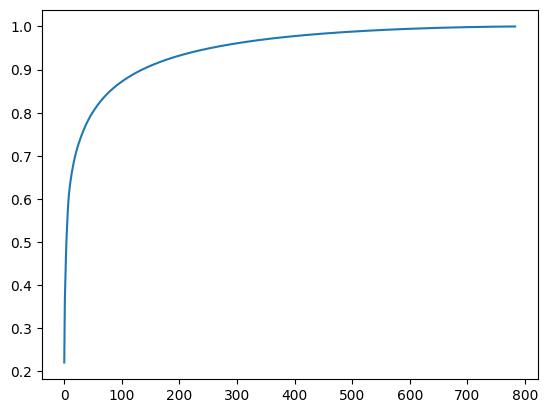

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### Observation

This code creates a graph to show how much of the dataset's information is kept as we add more components. It helps you decide the right number of components to use, so you can simplify the data without losing important details, making calculations faster and easier.